In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

### Model Accuracy Evaluation

<span style="color:red"> 1. accuracy_score </span>  
<span style="color:red"> 2. Confusion Matrix </span>

<span style="color:blue">성능지표에서 잘 활용되고 있는 오차행렬은 학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고(Confusion) 있는지를 잘 보여주는 지표가 된다.</span>  
ppt자료에 대한 이해를 돕기 위한 코드를 간단하게 작성해 보자.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

pred = model.predict(X_test)
score = accuracy_score(pred, y_test)

print(score)

0.9736842105263158


In [16]:
# Sample Data
y_true = [2,0,2,2,0,1] # 실제 target
y_pred = [0,0,2,2,0,2] # 예측할 값
confusion_matrix(y_true, y_pred)

# accuracy 방향 2 0 2 -> accuracy 가 100% 나오려면 대각선이 꽉 채워져 있어야함.
# 그 외의 부분에 값이 존재하는 것은 예측이 잘못된 부분이 존재한다는 것.

# 왼쪽 아래 1 : 실제 값이 2인데 예측값이 0인 부분이 1개 존재
# 오른쪽 2번째 1 : 실제 값이 1인데 예측값이 2인 부분이 1개 존재

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [17]:
a = ['cherry','apple','apple','banana','cherry'] #target
b = ['cherry','cherry','apple','banana','apple'] # predict

# 알파벳 순서로 인덱스 default
confusion_matrix(a, b)
# 대각선은 다 채워졌지만 나머지 부분에 값이 존재하므로 예측이 잘못된 부분이 존재한다.


array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=int64)

In [18]:
a = ['cherry','apple','apple','banana','cherry'] #target
b = ['cherry','cherry','apple','banana','apple'] # predict

# labels로 인덱스 순서 변경 가능.
confusion_matrix(a, b, labels=['cherry','apple','banana'])

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

### Confusion Matrix 를 실제 데이터에 적용 | 시각화

In [19]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,10,1
virginica,0,0,12


<AxesSubplot:>

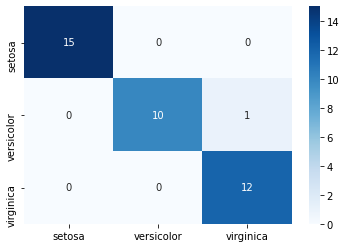

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

![ex_screenshot](../06_MachineLearning/evaluation.png)  

![ex_screenshot](../06_MachineLearning/precision_recall.png)  